In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data

In [2]:
#Reading market data for General Electric
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2016,1,1) 
ticker= 'GE'
df = data.get_data_yahoo(ticker,start,end)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,25.340000,25.459999,24.870001,25.059999,40920800,24.030339
2015-01-05,25.010000,25.010000,24.520000,24.600000,42033200,23.589240
2015-01-06,24.459999,24.570000,23.930000,24.070000,63760000,23.081016
2015-01-07,24.209999,24.389999,23.980000,24.080000,43642500,23.090606
2015-01-08,24.320000,24.379999,24.129999,24.370001,43224400,23.368691


In [158]:
#finding the maximum closing proce
max_close = df['Close'].max()
print('Highest Close:' + str(max_close  ))

Highest Close:31.280001


In [159]:
#find the day where the difference betwwen Open en Close is the largest
df['Diff'] = df['Close']-df['Open']
df['Diff'] = df['Diff'].apply(np.abs)
df.sort_values(by='Diff',ascending=False,inplace=True)
df.head(5)

,Open,High,Low,Close,Volume,Adj Close,Diff
Date,,,,,,,
2015-08-25,24.730000,24.740000,23.270000,23.270000,60778000,22.892367,1.460000
2015-04-10,27.129999,28.680000,27.000000,28.510000,352701900,27.810774,1.380001
2015-08-24,22.840000,24.040001,19.370001,23.870001,91236500,23.482631,1.030001
2015-09-09,25.200001,25.219999,24.480000,24.549999,34611200,24.151594,0.650002
2015-04-09,25.090000,25.830000,24.920000,25.730000,60149900,25.098955,0.640000


In [160]:
#find the days where the difference between open and close > 1USD
idx = df['Diff'] > 1
df.loc[idx,:]

,Open,High,Low,Close,Volume,Adj Close,Diff
Date,,,,,,,
2015-08-25,24.730000,24.740000,23.270000,23.270000,60778000,22.892367,1.460000
2015-04-10,27.129999,28.680000,27.000000,28.510000,352701900,27.810774,1.380001
2015-08-24,22.840000,24.040001,19.370001,23.870001,91236500,23.482631,1.030001


In [161]:
#difference in daily return between GE and Ford
df_GE = df['Close']
df_F = data.get_data_yahoo('F',start,end)['Close']
df_combined = pd.concat([df_GE,df_F],axis=1,keys = ['GE','F'])
df_combined_pctge = df_combined.pct_change(periods=1)

In [162]:
#find the average : which of the two methods do you prefer
print(np.mean(np.abs(df_combined_pctge['GE']-df_combined_pctge['F'])))

print((df_combined_pctge['GE']-df_combined_pctge['F']).apply(np.abs).mean())

0.00964534552894
0.00964534552894


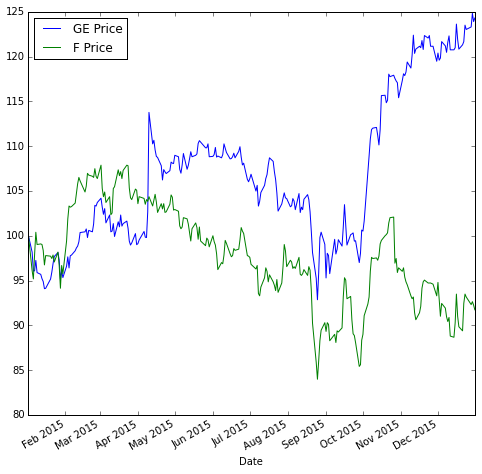

In [163]:
#plot a graph of F vs GE (starting in 100)
%matplotlib inline
df_combined = pd.concat([df_GE,df_F],axis=1,keys = ['GE','F'])
df_combined['GE Price'] = 100*df_combined['GE']/df_combined.ix[0,'GE']
df_combined['F Price'] = 100*df_combined['F']/df_combined.ix[0,'F']
df_combined.plot(kind='line',y=['GE Price','F Price'],use_index=True,figsize=(8,8))


In [164]:
#creating buckets of data
minvalue = np.min(np.round(df_combined['GE'].pct_change(periods=1),2).min(),
                  np.round(df_combined['F'].pct_change(periods=1),2).min() )
maxvalue = np.max(np.round(df_combined['GE'].pct_change(periods=1),2).max(),
                  np.round(df_combined['F'].pct_change(periods=1),2).max() )
bucket_width = 0.02
buckets = np.arange(minvalue,maxvalue,bucket_width)
buckets =np.append(buckets,maxvalue)

In [128]:
#grouping data into bins
Bins_GE = pd.cut(df_combined['GE'].pct_change(periods=1),bins=buckets,include_lowest=True)
Bins_GE.name = 'GE Bins'
Bins_F = pd.cut(df_combined['F'].pct_change(periods=1),bins=buckets,include_lowest=True)
Bins_F.name = 'F Bins'
df_Bins = pd.concat([Bins_GE,Bins_F],axis=1,keys=['GE','F'])
pd.concat([df_Bins.groupby('GE')['GE'].count(),df_Bins.groupby('F')['F'].count()],axis=1,keys=['GE','F'])

,GE,F
GE,,
"[-0.04, -0.02]",14,16
"(-0.02, 0]",99,117
"(0, 0.02]",124,99
"(0.02, 0.04]",11,17
"(0.04, 0.06]",2,0
"(0.06, 0.08]",0,0
"(0.08, 0.1]",0,0
"(0.1, 0.11]",1,0


In [169]:
#Calculating the Volatility 
df = data.get_data_yahoo('GE',start,end)['Close']
logreturns = np.log(df / df.shift(1))
print('Volatility: ' + str(np.sqrt(252*logreturns.var())))

Volatility: 0.220710554733


In [179]:
#calculating correlations between GE , F and MSFT
df = data.get_data_yahoo(['GE','F','MSFT'],start,end)['Close']
logreturns = np.log(df / df.shift(1))
print('Closing Prices')
print(df.head())
print('Daily Log Returns')
print(logreturns.head())
print('Correlation Matri')
print(logreturns.corr())

Closing Prices
                F         GE       MSFT
Date                                   
2015-01-02  15.36  25.059999  46.759998
2015-01-05  14.76  24.600000  46.330002
2015-01-06  14.62  24.070000  45.650002
2015-01-07  15.04  24.080000  46.230000
2015-01-08  15.42  24.370001  47.590000
Daily Log Returns
                   F        GE      MSFT
Date                                    
2015-01-02       NaN       NaN       NaN
2015-01-05 -0.039846 -0.018526 -0.009238
2015-01-06 -0.009530 -0.021780 -0.014786
2015-01-07  0.028323  0.000415  0.012625
2015-01-08  0.024952  0.011971  0.028994
Correlation Matri
             F        GE      MSFT
F     1.000000  0.527581  0.489760
GE    0.527581  1.000000  0.457674
MSFT  0.489760  0.457674  1.000000
